In [43]:
import os
print(os.environ["PYTHONPATH"])  # Should contain parent dirrectory of image_captioning module

/home/k/retail


In [44]:
import json

import pandas as pd
import numpy as np
import editdistance
import matplotlib.pyplot  as plt
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

import torch

import image_captioning.constants as C
from image_captioning.caption import caption_image_beam_search, visualize_att

In [45]:
with open("metrics.json") as f:
    metrics = json.load(f)
train_metrics = pd.DataFrame(metrics["train"])
train_metrics.columns = ["train_" + c for c in train_metrics.columns]
val_metrics = pd.DataFrame(metrics["val"])
val_metrics.columns = ["val_" + c for c in val_metrics.columns]
test_metrics = pd.DataFrame(metrics["test"])
test_metrics.columns = ["test_" + c for c in test_metrics.columns]
metrics = train_metrics.join(val_metrics).join(test_metrics)
metrics.head()

,train_error,train_losses,val_edit,val_error,val_losses,val_norm_edit,test_edit,test_error,test_losses,test_norm_edit
0,0.992400,2.969701,1.954167,0.961481,2.659595,0.544369,1.621289,0.931642,2.659493,0.543062
1,0.947022,2.499249,1.518757,0.884241,2.251171,0.418978,1.382537,0.848742,2.414452,0.458012
2,0.850769,2.145729,1.167544,0.777235,1.977497,0.321971,1.234160,0.768048,2.274745,0.409901
3,0.711470,1.874728,0.862332,0.616713,1.729761,0.233722,1.057239,0.670086,2.106052,0.348221
4,0.589789,1.698773,0.683840,0.501385,1.600981,0.189627,0.962045,0.617865,2.015882,0.318573


Text(0.5,0,'Epoch')

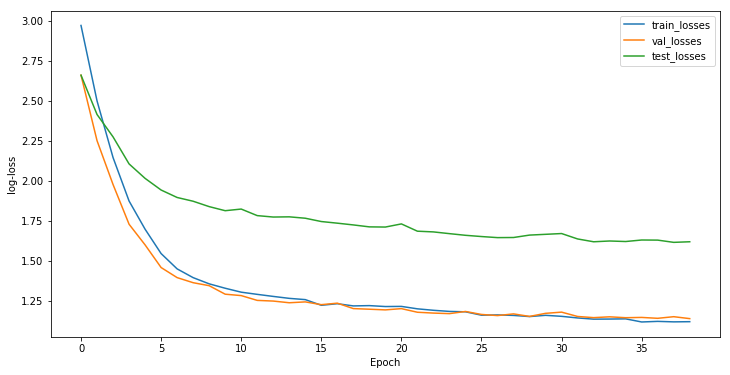

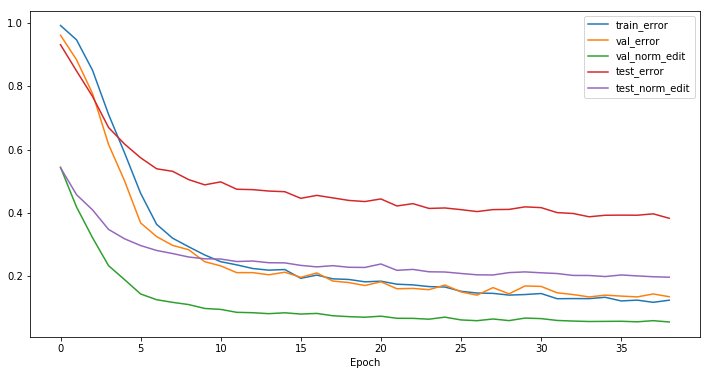

In [46]:
metrics[["train_losses", "val_losses", "test_losses"]].plot(figsize=(12,6))
#plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("log-loss")
metrics[["train_error", "val_error", "val_norm_edit", "test_error", "test_norm_edit"]].plot(figsize=(12,6))
#plt.yscale("log")
plt.xlabel("Epoch")